In [119]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [19]:
messages = pd.read_json(r"result.json")

In [20]:
messages = messages[['id', 'date', 'from','text']]
messages['sender'] = messages['from'].apply(lambda x: 'Anna' if x == 'Анюта' else 'Pavel')
messages = messages[['id', 'date', 'sender','text']]

In [21]:
messages

,id,date,sender,text
0,329929,2021-06-01 00:01:10,Anna,Бля срочно
1,329930,2021-06-01 00:01:11,Anna,Срочно
2,329931,2021-06-01 00:01:15,Anna,Честно ответь
3,329932,2021-06-01 00:01:20,Anna,Ты вытираешь жопу стоя?
4,329933,2021-06-01 00:01:30,Pavel,Эм
...,...,...,...,...
32840,391118,2021-10-27 23:43:37,Pavel,
32841,391119,2021-10-27 23:43:39,Pavel,А такое снимешь? 🥺👉👈
32842,391120,2021-10-27 23:43:52,Pavel,Скинул сюда потому что тикток опять блокнет
32843,391121,2021-10-27 23:46:56,Anna,Ахах


In [25]:
 
    # Count


In [37]:
messages['day'] = messages['date'].apply(lambda x : x.date())

In [44]:
piv_count_messages_day = pd.pivot_table(messages, index = 'day',columns = 'sender', values = 'id',aggfunc='count')
piv_count_messages_day = piv_count_messages_day.reset_index()

anna_count = messages[messages.sender == 'Anna'].shape[0]
pavel_count = messages[messages.sender != 'Anna'].shape[0]
anna_mean = piv_count_messages_day['Anna'].mean()
pavel_mean = piv_count_messages_day['Pavel'].mean()
anna_median = piv_count_messages_day['Anna'].median()
pavel_median = piv_count_messages_day['Pavel'].median()

In [45]:
piv_count_messages_day

sender,day,Anna,Pavel
0,2021-06-01,327.0,189.0
1,2021-06-02,360.0,147.0
2,2021-06-03,150.0,74.0
3,2021-06-04,150.0,76.0
4,2021-06-05,271.0,122.0
...,...,...,...
144,2021-10-23,79.0,71.0
145,2021-10-24,3.0,4.0
146,2021-10-25,147.0,79.0
147,2021-10-26,133.0,80.0


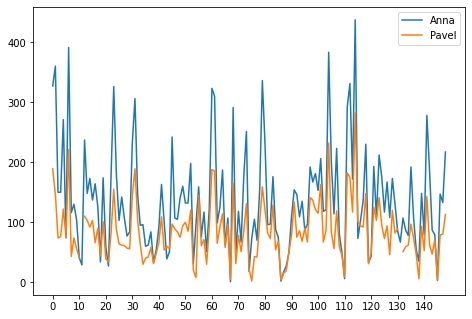

In [97]:
love_tagsfig = plt.figure();
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(np.arange(0, 150, 10))
ax.plot(piv_count_messages_day['Anna'])
ax.plot(piv_count_messages_day['Pavel'])
ax.legend(['Anna','Pavel']); 


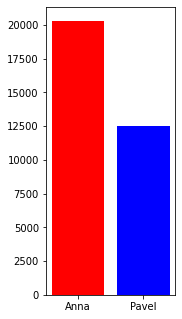

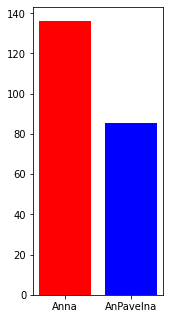

In [69]:
fig = plt.figure()
fig1 = plt.figure()
ax = fig.add_axes([1,1,0.3,1])
ax_mean = fig1.add_axes([1,1,0.3,1])
langs = ['Anna', 'Pavel']
students = [anna_count,pavel_count]
ax.bar('Anna',anna_count,color = 'red')
ax.bar('Pavel',pavel_count,color = 'blue')
ax_mean.bar('Anna',anna_mean,color = 'red')
ax_mean.bar('AnPavelna',pavel_mean,color = 'blue')
plt.show()

In [98]:
# love


In [152]:
tags = pd.read_excel(r'tags.xlsx')

In [153]:
love_tags = tags[tags.name == 'love']['tags'][0]
love_tags = love_tags.split(';')
love_tags = '|'.join(love_tags)
love_compile = re.compile(love_tags)

ans_tags = tags[tags.name == 'answer']['tags'][1]
ans_tags = ans_tags.split(';')
ans_tags = '|'.join(ans_tags)
ans_compile = re.compile(ans_tags)

serd_tags = tags[tags.name == 'serd']['tags'][2]
serd_tags = serd_tags.split(';')
serd_tags = '|'.join(serd_tags)
serd_compile = re.compile(serd_tags)

In [154]:
messages['text'] = messages['text'].apply(str)
messages['love'] = messages['text'].apply(lambda x: bool(love_compile.search(x)))
messages['ans'] = messages['text'].apply(lambda x: bool(ans_compile.search(x)))
messages['serd'] = messages['text'].apply(lambda x: bool(serd_compile.search(x)))

In [145]:
messages[(messages.love) & (messages.sender == 'Pavel')].shape[0]

50

In [146]:
messages[(messages.love) & (messages.sender == 'Anna')].shape[0]

24

In [147]:
messages[(messages.ans) & (messages.sender == 'Pavel')].shape[0]

0

In [149]:
messages[(messages.ans) & (messages.sender == 'Anna')].shape[0]

8

In [156]:
messages[(messages.serd)]

,id,date,sender,text,day,love,ans,serd
94,330115,2021-06-01 00:25:40,Pavel,Добрых снов❤️,2021-06-01,False,False,True
97,330118,2021-06-01 00:25:59,Anna,💜,2021-06-01,False,False,True
161,330256,2021-06-01 12:36:50,Pavel,😍😍😍,2021-06-01,False,False,True
169,330274,2021-06-01 12:40:58,Pavel,❤️,2021-06-01,False,False,True
558,331063,2021-06-02 00:41:52,Pavel,❤️чмок,2021-06-02,False,False,True
...,...,...,...,...,...,...,...,...
32301,390377,2021-10-25 23:50:55,Pavel,Доброй ночи❤️\nЯ тоже спать\nИ я тебя люблю,2021-10-25,True,False,True
32515,390673,2021-10-27 00:00:48,Pavel,"Доброй ночи, счастье мое❤️",2021-10-27,False,False,True
32516,390674,2021-10-27 00:07:08,Anna,Сладких снов💜,2021-10-27,False,False,True
32521,390679,2021-10-27 09:02:55,Pavel,Доброе утро красавица❤️,2021-10-27,False,False,True


In [175]:
piv_love = pd.pivot_table(messages, index = 'sender',values = ['love','ans','serd'],aggfunc='sum')

In [176]:
piv_love = piv_love.reset_index()

In [177]:
piv_love

,sender,ans,love,serd
0,Anna,8,24,119
1,Pavel,0,50,344
